In [1]:
import json
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#try:  
#    data = pd.read_json("https://codeforces.com/api/user.ratedList?activeOnly=false")
#    ratedListAll = pd.DataFrame.from_records(data['result'])
#    ratedListAll
#except (BaseException) as e:    
#    print(e)
#    print(alink)

In [3]:
#ratedListAll.to_csv('ratedList_18Feb2021.csv')

In [4]:
ratedListAll=pd.read_csv('ratedList_18Feb2021.csv')

In [106]:
ratedListAll.describe()

,Unnamed: 0,lastOnlineTimeSeconds,rating,friendOfCount,contribution,maxRating,registrationTimeSeconds,vkId
count,323553.000000,3.235530e+05,323553.000000,323553.000000,323553.000000,323553.000000,3.235530e+05,9.490000e+02
mean,161776.000000,1.569183e+09,1279.355314,10.854960,0.249189,1378.830658,1.506599e+09,2.737060e+08
std,93401.850161,6.274901e+07,389.487917,90.425584,4.625026,385.378198,8.492631e+07,3.222676e+09
min,0.000000,1.267967e+09,-47.000000,0.000000,-119.000000,353.000000,0.000000e+00,1.300000e+01
25%,80888.000000,1.551078e+09,1111.000000,0.000000,0.000000,1371.000000,1.452607e+09,6.009966e+07
50%,161776.000000,1.597768e+09,1347.000000,1.000000,0.000000,1411.000000,1.532925e+09,1.521058e+08
75%,242664.000000,1.611720e+09,1460.000000,7.000000,0.000000,1519.000000,1.576153e+09,2.437834e+08
max,323552.000000,1.613678e+09,3748.000000,32510.000000,200.000000,3783.000000,1.613661e+09,9.936507e+10


In [5]:
#let's skip those users who has never reached Blue; getting low 1200 is usually done for purpose, let's skip them as well
ratedOver1600=ratedListAll[(ratedListAll['maxRating']>=1600) & (ratedListAll['rating']>=1200)]


,Unnamed: 0,lastName,country,lastOnlineTimeSeconds,city,rating,friendOfCount,titlePhoto,handle,avatar,firstName,contribution,organization,rank,maxRating,registrationTimeSeconds,maxRank,email,vkId,openId
0,0,Korotkevich,Belarus,1613668439,Gomel,3748,32510,//userpic.codeforces.com/422/title/50a270ed4a7...,tourist,//userpic.codeforces.com/422/avatar/2b5dbe87f0...,Gennady,149,ITMO University,legendary grandmaster,3783,1265987288,legendary grandmaster,NaN,NaN,NaN
1,1,NaN,Samoa,1613370972,NaN,3681,10009,//userpic.codeforces.com/19965/title/8790c1f69...,Retired_MiFaFaOvO,//userpic.codeforces.com/19965/avatar/65aa71a0...,MiFaFa,114,National University of Samoa,legendary grandmaster,3681,1306208507,legendary grandmaster,NaN,NaN,NaN
2,2,Qi,United States,1613604241,Princeton,3540,5289,//userpic.codeforces.com/312472/title/7cf0a442...,Benq,//userpic.codeforces.com/312472/avatar/5716ac6...,Benjamin,105,MIT,legendary grandmaster,3633,1435099979,legendary grandmaster,NaN,NaN,NaN
3,3,Mitrichev,Switzerland,1613670604,Zurich,3470,9878,//userpic.codeforces.com/664/title/c1ef9e749ca...,Petr,//userpic.codeforces.com/664/avatar/a113c1791c...,Petr,133,Google,legendary grandmaster,3597,1267103024,legendary grandmaster,NaN,NaN,NaN
4,4,Radecki,NaN,1612994229,NaN,3355,5939,//userpic.codeforces.com/147752/title/13dfa099...,Radewoosh,//userpic.codeforces.com/147752/avatar/a91526f...,Mateusz,161,University of Warsaw,legendary grandmaster,3527,1385208270,legendary grandmaster,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219162,219162,NaN,NaN,1415208676,NaN,1203,4,//userpic.codeforces.com/no-title.jpg,hello_1,//userpic.codeforces.com/no-avatar.jpg,NaN,0,NaN,pupil,1648,1391441525,expert,NaN,NaN,NaN
219598,219598,NaN,NaN,1607615530,NaN,1202,25,//userpic.codeforces.com/65842/title/569befcf6...,vlc_media_player,//userpic.codeforces.com/65842/avatar/6555f8b2...,NaN,0,NaN,pupil,1678,1348241911,expert,NaN,NaN,NaN
219958,219958,NaN,NaN,1455316934,NaN,1200,4,//userpic.codeforces.com/no-title.jpg,LazyNat,//userpic.codeforces.com/no-avatar.jpg,NaN,0,NaN,pupil,1657,1320347357,expert,NaN,NaN,NaN
220078,220078,NaN,Japan,1530404078,Nichinan,1200,15,//userpic.codeforces.com/no-title.jpg,fujiyama,//userpic.codeforces.com/no-avatar.jpg,NaN,0,NaN,pupil,1689,1267709136,expert,NaN,NaN,NaN


In [14]:
#alink='https://codeforces.com/api/user.rating?handle=mamaau'
#try:
#    data = pd.read_json(alink)
#    dfAll = pd.DataFrame.from_records(data['result'])
#    dfAll
#except (BaseException) as e:    
#    print(e)
#    print(alink)

In [8]:
#for j in ratedOver1600['handle']:
#    try:
#        link='https://codeforces.com/api/user.rating?handle=' + j
#        data = pd.read_json(link)
#        if data['status'][0]=='OK':
#            df = pd.DataFrame.from_records(data['result'])
#            dfAll=pd.concat([dfAll,df],ignore_index=True)
#    except (BaseException) as e:    
#        print(j)
#        #ratedListAll[ratedListAll['handle']==j][0]
#        print(e)

In [31]:
#dfAll.to_csv('ratingHistoryOver1600_24Feb2021.csv')

In [147]:
dfAll=pd.read_csv('ratingHistoryOver1600_24Feb2021.csv')

In [191]:
data=dfAll
data=data[['handle','ratingUpdateTimeSeconds','newRating']]

In [192]:
basic=data.groupby('handle').head(1)
basic.set_index('handle',inplace=True)
#basic=basic[basic['newRating']<1500]
basic.rename(columns={'ratingUpdateTimeSeconds':'timeFirst','newRating':'ratingFirst'},inplace=True)
basic

C:\Users\papa\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,timeFirst,ratingFirst
handle,,
tourist,1267124400,1602
Retired_MiFaFaOvO,1310144400,1526
Benq,1436893800,1404
Petr,1267124400,1625
Radewoosh,1409068800,1733
...,...,...
hello_1,1391449500,1559
vlc_media_player,1366911000,1448
LazyNat,1322931600,1438


In [193]:
basic['ratingFirst'].describe()

count    56252.00000
mean      1486.53223
std        222.31615
min        356.00000
25%       1422.00000
50%       1490.00000
75%       1609.00000
max       1978.00000
Name: ratingFirst, dtype: float64

In [194]:
red=data[data['newRating']>=2400]
red=red.groupby('handle').head(1)
red.set_index('handle',inplace=True)
red.rename(columns={'ratingUpdateTimeSeconds':'timeRed','newRating':'ratingRed'},inplace=True)
red

,timeRed,ratingRed
handle,,
tourist,1295978400,2419
Retired_MiFaFaOvO,1419960600,2429
Benq,1492364100,2419
Petr,1304182800,2416
Radewoosh,1440268200,2404
...,...,...
lovelymoon,1384882500,2467
kutengine,1412524800,2414
Edvard,1429036500,2419


In [195]:
basicRed=pd.merge(basic,red, on='handle')
basicRed

,timeFirst,ratingFirst,timeRed,ratingRed
handle,,,,
tourist,1267124400,1602,1295978400,2419
Retired_MiFaFaOvO,1310144400,1526,1419960600,2429
Benq,1436893800,1404,1492364100,2419
Petr,1267124400,1625,1304182800,2416
Radewoosh,1409068800,1733,1440268200,2404
...,...,...,...,...
lovelymoon,1377538200,1742,1384882500,2467
kutengine,1371056400,1762,1412524800,2414
Edvard,1266588000,1498,1429036500,2419


In [196]:
basicRed.head(10)

,timeFirst,ratingFirst,timeRed,ratingRed
handle,,,,
tourist,1267124400,1602,1295978400,2419
Retired_MiFaFaOvO,1310144400,1526,1419960600,2429
Benq,1436893800,1404,1492364100,2419
Petr,1267124400,1625,1304182800,2416
Radewoosh,1409068800,1733,1440268200,2404
ecnerwala,1342027800,1448,1406914200,2405
maroonrk,1483116300,1677,1527443400,2414
jiangly,1547993100,1683,1562949300,2409
scott_wu,1293561000,1564,1358694000,2459


In [197]:
basicRed['deltaRed']=(basicRed['timeRed']-basicRed['timeFirst'])/(60*60*24)

In [198]:
basicRed.head(10)

,timeFirst,ratingFirst,timeRed,ratingRed,deltaRed
handle,,,,,
tourist,1267124400,1602,1295978400,2419,333.958333
Retired_MiFaFaOvO,1310144400,1526,1419960600,2429,1271.020833
Benq,1436893800,1404,1492364100,2419,642.017361
Petr,1267124400,1625,1304182800,2416,428.916667
Radewoosh,1409068800,1733,1440268200,2404,361.104167
ecnerwala,1342027800,1448,1406914200,2405,751.000000
maroonrk,1483116300,1677,1527443400,2414,513.045139
jiangly,1547993100,1683,1562949300,2409,173.104167
scott_wu,1293561000,1564,1358694000,2459,753.854167


Text(0.5, 1.0, 'Days before becoming red')

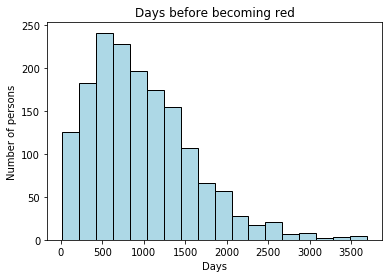

In [210]:
_, ax = plt.subplots()
ax.hist(basicRed['deltaRed'],bins=18, color='lightblue',edgecolor='black')
ax.set_xlabel('Days')
ax.set_ylabel('Number of persons')
ax.set_title('Days before becoming red')

In [200]:
basicRed['deltaRed'].describe()

count    1622.000000
mean      972.453212
std       619.850802
min        17.840278
25%       512.505208
50%       866.930556
75%      1322.723958
max      3689.086806
Name: deltaRed, dtype: float64

Text(0.5, 1.0, 'Days before becoming red')

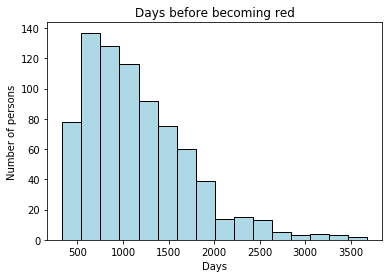

In [211]:
_, ax = plt.subplots()
ax.hist(basicRed[(basicRed['deltaRed']>333) & (basicRed['ratingFirst']<1600)]['deltaRed'],bins=16, color='lightblue',edgecolor='black')
ax.set_xlabel('Days')
ax.set_ylabel('Number of persons')
ax.set_title('Days before becoming red')

In [136]:
basicRed[(basicRed['deltaRed']>333) & (basicRed['ratingFirst']<1600)]['deltaRed'].describe()

count     784.000000
mean     1160.837442
std       570.177517
min       335.937500
25%       727.321181
50%      1055.625000
75%      1462.424479
max      3675.107639
Name: deltaRed, dtype: float64

In [212]:
basicRed[(basicRed['deltaRed']>3000) & (basicRed['ratingFirst']<1600)]

,timeFirst,ratingFirst,timeRed,ratingRed,deltaRed
handle,,,,,
Yousef_Salama,1300471200,1375,1578240300,2452,3214.920139
buko,1268402400,1559,1585931700,2424,3675.107639
IMAN_GH,1344965400,1458,1609349700,2456,3060.003472
catupper,1301418000,1505,1566751200,2407,3070.986111
pichulia,1298916000,1598,1586707500,2440,3330.920139
Heart_Blue,1312398000,1451,1602948900,2425,3362.857639
amylase,1302714000,1492,1606640700,2402,3517.670139
kilotaras,1286010000,1446,1579448100,2440,3396.274306
nwi,1320340200,1437,1586707500,2426,3082.954861
